In [79]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
import PIL
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
class CustomDataSet(Dataset):

    def __init__(self,image_dir, label_file, transform=None):
        self.image_dir = image_dir
        self.image_files = os.listdir(image_dir)
        self.transform = transform
        self.labels = self.get_labels(label_file)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        image_index = [int(re.findall(r'\d+', x)[0]) for x in self.image_files]
        image_index.sort()
        
        image_name= os.path.join(self.image_dir, 'Image_'+str(image_index[index])+'.png') 
        image = PIL.Image.open(image_name)
        label = self.labels[index]
        if self.transform:
            image = self.transform(image)
        return (image, label)
    
    def get_labels(self,label_file):
        with open('train_label.txt') as f:
            labels = f.read().split('\n')
            return labels

In [81]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
image_dir = './train_images/train_images/'
label_file = 'train_label.txt'
transform_img = transforms.Compose([
                            transforms.Resize(80),
                            transforms.CenterCrop(80),
                            transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [82]:
dataset = CustomDataSet(image_dir, label_file, transform = transform_img)

In [83]:
print(dataset.__len__())

49999


In [84]:
#Train-test-validation split
l = dataset.__len__()
train_split = 0.8
test_split = 0.1
val_split = 0.1

train_size = int(train_split*l)
test_size = int(test_split*l)
val_size = l - (train_size + test_size)

#print(train_size + test_size + val_size)
train_dataset, test_dataset = random_split(dataset, [train_size+val_size, test_size])
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [66]:
#Train-test-validation split
l = dataset.__len__()
train_split = 0.9
test_split = 0.1

train_size = int(train_split*l)
test_size = l - train_size
print(train_size, test_size)
#print(train_size + test_size + val_size)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

44999 5000


In [85]:
trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: ship


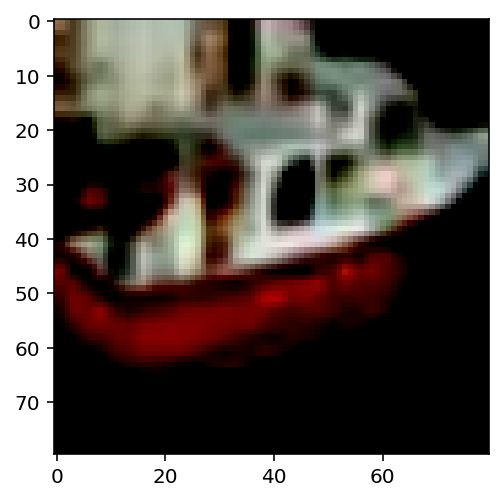

In [86]:
def show_image(image, label, dataset):
    print(f"Label: {label}") 
    plt.imshow(image.permute(1,2,0))
    plt.show()

show_image(*train_dataset[0], train_dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: ship


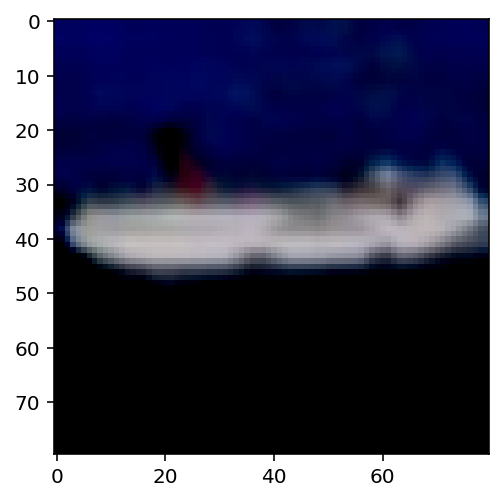

In [78]:
def show_image(image, label, dataset):
    print(f"Label: {label}") 
    plt.imshow(image.permute(1,2,0))
    plt.show()

    
show_image(*dataset[5], dataset)